<a href="https://colab.research.google.com/github/PythonDSBook/notebooks/blob/main/Chapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第12章 ロジスティック回帰

## 12.6 プログラミング

### コード 12.1 ライブラリのインポート

In [ ]:
!pip install japanize_matplotlib

In [51]:
import japanize_matplotlib

In [52]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### コード 12.2 データセットの取得とデータフレームの作成

In [53]:
URL = (
  'https://archive.ics.uci.edu/ml/'
  'machine-learning-databases/adult/adult.data'
)
df = pd.read_csv(URL, header=None)
df.columns = [
  'age', 'workclass', 'fnlwgt',
  'education', 'education-num', 'marital-status',
  'occupation', 'relationship', 'race',
  'sex', 'capital-gain', 'capital-loss',
  'hours-per-week', 'native-country', 'income'
]

In [ ]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(URL, header=None)
df.columns = [
  'age', 'workclass', 'fnlwgt',
  'education', 'education-num', 'marital-status',
  'occupation', 'relationship', 'race',
  'sex', 'capital-gain', 'capital-loss',
  'hours-per-week', 'native-country', 'income'
]

### コード 12.3 ラベルの数値表現

In [54]:
df['income'] = (df['income'] == ' >50K').astype(int)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### プログラム 12.1 関数`gradient_descent_lr`

In [55]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def gradient_descent_lr(X, y, eta, n_iter):
  m = X.shape[0]
  w = np.zeros(X.shape[1])
  history = []

  for _ in range(n_iter):
    g = sigmoid(X @ w)
    error = g - y
    w = w -  eta * (1 / m) * (X.T @ error)
    cost = (-1 / m) * (
      np.sum(y * np.log(g) + (1 - y) * np.log(1 - g))
    )
    history.append(cost)

  return w, history

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def gradient_descent_lr(X, y, eta, n_iter):
  m = X.shape[0]
  w = np.zeros(X.shape[1])
  history = []

  for _ in range(n_iter):
    g = sigmoid(X @ w)
    error = g - y
    w = w -  eta * (1 / m) * (X.T @ error)
    cost = (-1 / m) * np.sum(y * np.log(g) + (1 - y) * np.log(1 - g))
    history.append(cost)

  return w, history

### コード 12.4 訓練データとテストデータ

In [56]:
features = ['age']

X = df[features].values
y = df['income'].values
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=10
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

### コード 12.5 関数`gradient_descent_lr`の実行

In [57]:
eta = 0.05
n_iter = 1000
w, history = gradient_descent_lr(
  X_train, y_train, eta, n_iter
)
print('w: ', np.round(w, 3))

w:  [-1.224  0.547]


In [ ]:
eta = 0.05
n_iter = 1000
w, history = gradient_descent_lr(X_train, y_train, eta, n_iter)
print('w: ', np.round(w, 3))

w:  [-1.224  0.547]


### 図 12.3

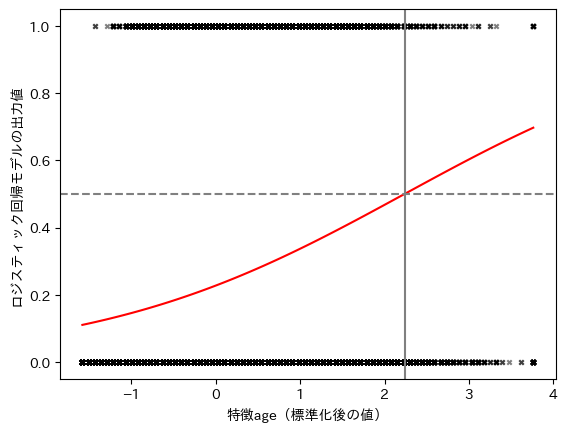

In [58]:
X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
plt.plot(X_plot, sigmoid(w[1] * X_plot + w[0]), c='red')
plt.scatter(X_train[:,1], y_train, label="data", s=10, c='k', marker='x', alpha=0.5)
threshold = 0.5
decision_boundary = -w[0] / w[1]
plt.axvline(decision_boundary, color='gray')
plt.axhline(threshold, color='gray', ls='dashed')
plt.xlabel("特徴age（標準化後の値）")
plt.ylabel("ロジスティック回帰モデルの出力値")
plt.show()

### プログラム 12.2 関数`calculate_metrics`

In [59]:
def calculate_metrics(y, y_pred):
  tp = np.sum((y == 1) & (y_pred == 1))
  fp = np.sum((y == 0) & (y_pred == 1))
  tn = np.sum((y == 0) & (y_pred == 0))
  fn = np.sum((y == 1) & (y_pred == 0))

  accuracy = (tp + tn) / (tp + fp + fn + tn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1 = 2 * precision * recall / (precision + recall)

  return accuracy, precision, recall, f1

### コード 12.6 評価指標の計算の実行

In [60]:
y_pred = sigmoid(X_test @ w) > 0.5
results = calculate_metrics(y_test, y_pred)
print(
  f'Accuracy: {results[0]:.2f}',
  f'Precision: {results[1]:.2f}',
  f'Recall: {results[2]:.2f}',
  f'F1: {results[3]:.2f}'
)

Accuracy: 0.74 Precision: 0.15 Recall: 0.01 F1: 0.02


### コード 12.7 関数`gradient_descent_lr`の実行

In [61]:
features = ['age', 'education-num']
X = df[features].values
y = df['income'].values
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=10
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [62]:
alpha = 0.05
n_iter = 2000
w, history = gradient_descent_lr(
  X_train, y_train, alpha, n_iter
)
print('w: ', np.round(w, 2))

w:  [-1.43  0.6   0.93]


In [ ]:
alpha = 0.05
n_iter = 2000
w, history = gradient_descent_lr(X_train, y_train, alpha, n_iter)
print('w: ', np.round(w, 2))

w:  [-1.43  0.6   0.93]


### 図 12.4

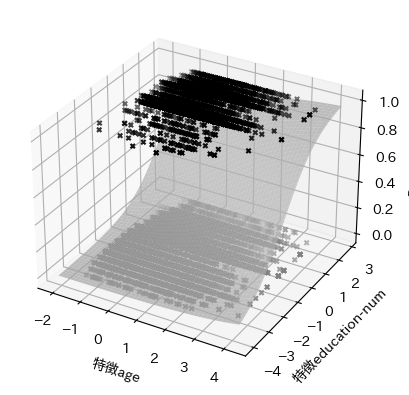

In [63]:
x_min, x_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
y_min, y_max = X_train[:, 2].min() - .5, X_train[:, 2].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
X_plot = np.insert(np.c_[xx.ravel(), yy.ravel()], 0, 1, axis=1)
Z = sigmoid(X_plot @ w).reshape(xx.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, color='lightgray', alpha=0.7)
ax.scatter(X_train[y_train==1, 1], X_train[y_train==1, 2], 1, marker='x', c='black', s=10)
ax.scatter(X_train[y_train==0, 1], X_train[y_train==0, 2], 0, marker='x', c='gray', s=10)
ax.set_xlabel('特徴age')
ax.set_ylabel('特徴education-num')
ax.set_zlabel('Probability')
plt.show()

### 図 12.5

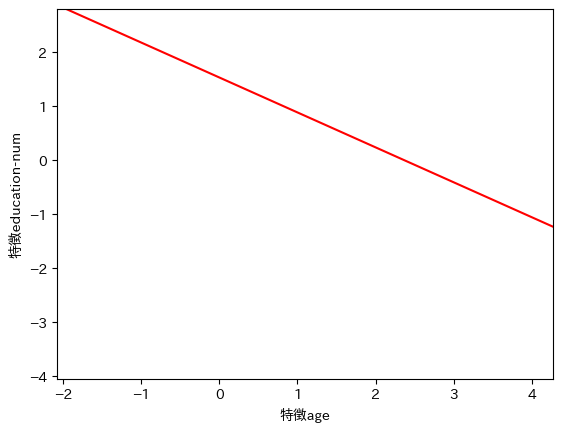

In [64]:
X_plot = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100).reshape(-1,1)
plt.plot(X_plot, -(w[0] + w[1] * X_plot) / w[2], c='red')
plt.xlabel('特徴age')
plt.ylabel('特徴education-num')
plt.xlim(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5)
plt.ylim(X_train[:, 2].min() - .5, X_train[:, 2].max() + .5)
plt.show()

### コード 12.8 評価指標の計算の実行

In [65]:
y_pred = sigmoid(X_test @ w) > 0.5
results = calculate_metrics(y_test, y_pred)
print(
  f'Accuracy: {results[0]:.2f}',
  f'Precision: {results[1]:.2f}',
  f'Recall: {results[2]:.2f}',
  f'F1: {results[3]:.2f}'
)

Accuracy: 0.78 Precision: 0.60 Recall: 0.25 F1: 0.35


### コード 12.9 scikit-learnの`LogisticRegression`クラスによるロジスティック回帰

In [66]:
features = ['age', 'education-num']
X = df[features].values
y = df['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f1)
print(confusion_matrix(y_test, y_pred))

[[0.60066054 0.92770699]]
[-1.4254925]
0.7773683402425917 0.601823708206687 0.25 0.35325602140945583
[[4667  262]
 [1188  396]]


### コード 12.10 混同行列の可視化

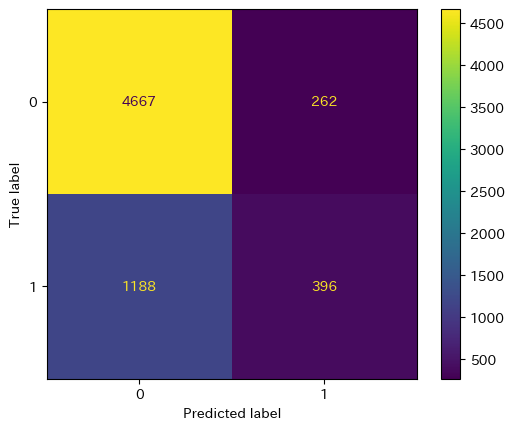

In [68]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm, display_labels=model.classes_
)
disp.plot()
plt.show()